In [1]:
#necessory imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading data
travel_df = pd.read_excel(r'C:\Users\aravindh\Downloads\TravelInsurancePrediction.xlsx',index_col='index')
travel_df.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,Gender,OwnCar,MaritalStatus,TravelInsurance
index,,,,,,,,,,,,
1,31,Government Sector,Yes,400000,6,1,No,No,Female,1,Single,0
2,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,Male,1,Divorced,0
3,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,Male,0,Single,1
4,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,Female,1,Divorced,0
5,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,Male,1,Divorced,0


In [3]:
travel_df.shape

(2148, 12)

In [4]:
travel_df.isna().sum()

Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
Gender                 0
OwnCar                 0
MaritalStatus          0
TravelInsurance        0
dtype: int64

In [5]:
travel_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2148 entries, 1 to 2148
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  2148 non-null   int64 
 1   Employment Type      2148 non-null   object
 2   GraduateOrNot        2148 non-null   object
 3   AnnualIncome         2148 non-null   int64 
 4   FamilyMembers        2148 non-null   int64 
 5   ChronicDiseases      2148 non-null   int64 
 6   FrequentFlyer        2148 non-null   object
 7   EverTravelledAbroad  2148 non-null   object
 8   Gender               2148 non-null   object
 9   OwnCar               2148 non-null   int64 
 10  MaritalStatus        2148 non-null   object
 11  TravelInsurance      2148 non-null   int64 
dtypes: int64(6), object(6)
memory usage: 218.2+ KB


In [6]:
travel_df['TravelInsurance'].value_counts(normalize = True)

0    0.641527
1    0.358473
Name: TravelInsurance, dtype: float64

In [7]:
travel_df.columns = ['age', 'employment_type','graduate_or_not','annual_income','family_members', 'chronic_diseases', 
                     'frequent_flyer','ever_travelled_abroad', 'gender', 'own_car', 'marital_status','travel_insurance']


In [8]:
# travel_df.columns = travel_df.columns.str.replace(' ','_')

# Outliers

In [9]:
travel_df.columns

Index(['age', 'employment_type', 'graduate_or_not', 'annual_income',
       'family_members', 'chronic_diseases', 'frequent_flyer',
       'ever_travelled_abroad', 'gender', 'own_car', 'marital_status',
       'travel_insurance'],
      dtype='object')

<AxesSubplot:ylabel='age'>

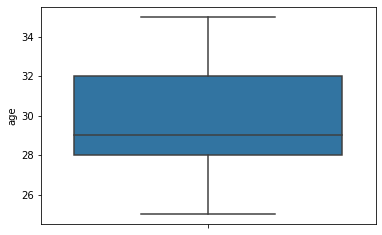

In [10]:
sns.boxplot(y='age',data=travel_df)

<AxesSubplot:ylabel='annual_income'>

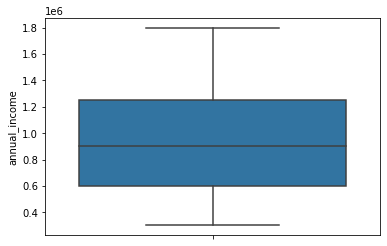

In [11]:
sns.boxplot(y='annual_income',data=travel_df)

<AxesSubplot:ylabel='family_members'>

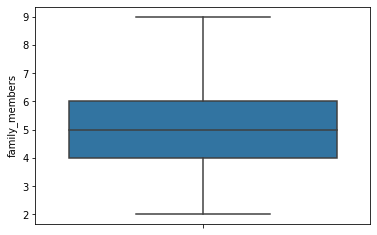

In [12]:
sns.boxplot(y='family_members',data=travel_df)

# Encoding

In [13]:
travel_df.columns

Index(['age', 'employment_type', 'graduate_or_not', 'annual_income',
       'family_members', 'chronic_diseases', 'frequent_flyer',
       'ever_travelled_abroad', 'gender', 'own_car', 'marital_status',
       'travel_insurance'],
      dtype='object')

In [14]:
travel_df.gender = travel_df.gender.str.replace('Fe Male','Female')
travel_df.gender.value_counts()

Male      1281
Female     867
Name: gender, dtype: int64

In [15]:
x = travel_df.drop(columns=['travel_insurance'])
y = travel_df['travel_insurance']

In [16]:
x.head()

,age,employment_type,graduate_or_not,annual_income,family_members,chronic_diseases,frequent_flyer,ever_travelled_abroad,gender,own_car,marital_status
index,,,,,,,,,,,
1,31,Government Sector,Yes,400000,6,1,No,No,Female,1,Single
2,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,Male,1,Divorced
3,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,Male,0,Single
4,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,Female,1,Divorced
5,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,Male,1,Divorced


In [17]:
y.head()

index
1    0
2    0
3    1
4    0
5    0
Name: travel_insurance, dtype: int64

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [19]:
x.gender.value_counts()

Male      1281
Female     867
Name: gender, dtype: int64

In [20]:
for item in ['employment_type','graduate_or_not','frequent_flyer','ever_travelled_abroad','gender']:
    x[item] = le.fit_transform(x[item])

In [21]:
x.head()

,age,employment_type,graduate_or_not,annual_income,family_members,chronic_diseases,frequent_flyer,ever_travelled_abroad,gender,own_car,marital_status
index,,,,,,,,,,,
1,31,0,1,400000,6,1,0,0,0,1,Single
2,31,1,1,1250000,7,0,0,0,1,1,Divorced
3,34,1,1,500000,4,1,0,0,1,0,Single
4,28,1,1,700000,3,1,0,0,0,1,Divorced
5,28,1,1,700000,8,1,1,0,1,1,Divorced


In [22]:
x = pd.get_dummies(x,columns=['marital_status'])

In [23]:
x.head()

,age,employment_type,graduate_or_not,annual_income,family_members,chronic_diseases,frequent_flyer,ever_travelled_abroad,gender,own_car,marital_status_Divorced,marital_status_Married,marital_status_Single,marital_status_Unmarried
index,,,,,,,,,,,,,,
1,31,0,1,400000,6,1,0,0,0,1,0,0,1,0
2,31,1,1,1250000,7,0,0,0,1,1,1,0,0,0
3,34,1,1,500000,4,1,0,0,1,0,0,0,1,0
4,28,1,1,700000,3,1,0,0,0,1,1,0,0,0
5,28,1,1,700000,8,1,1,0,1,1,1,0,0,0


# Exploratory data analysis

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'annual_income'}>],
       [<AxesSubplot:title={'center':'family_members'}>,
        <AxesSubplot:title={'center':'chronic_diseases'}>],
       [<AxesSubplot:title={'center':'own_car'}>,
        <AxesSubplot:title={'center':'travel_insurance'}>]], dtype=object)

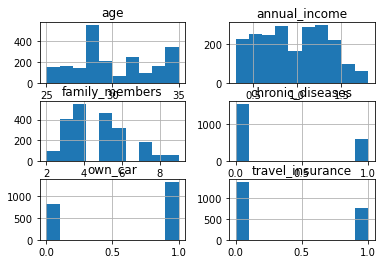

In [24]:
travel_df.hist()

In [25]:
travel_df.head()

,age,employment_type,graduate_or_not,annual_income,family_members,chronic_diseases,frequent_flyer,ever_travelled_abroad,gender,own_car,marital_status,travel_insurance
index,,,,,,,,,,,,
1,31,Government Sector,Yes,400000,6,1,No,No,Female,1,Single,0
2,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,Male,1,Divorced,0
3,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,Male,0,Single,1
4,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,Female,1,Divorced,0
5,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,Male,1,Divorced,0


<AxesSubplot:xlabel='graduate_or_not', ylabel='count'>

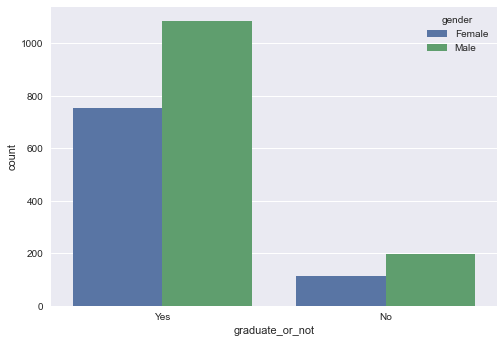

In [26]:
plt.style.use('seaborn')
sns.countplot(x='graduate_or_not',data=travel_df,hue='gender')

We can see from the graph that the amount non graduates are really low compared to graduates. Also Males are more in both categories

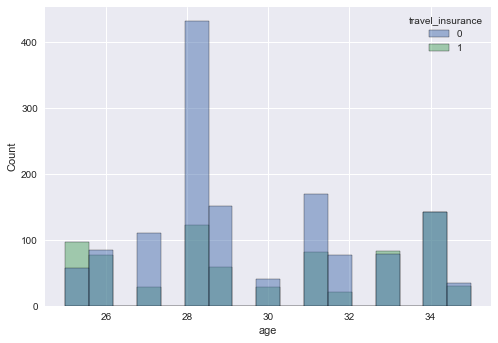

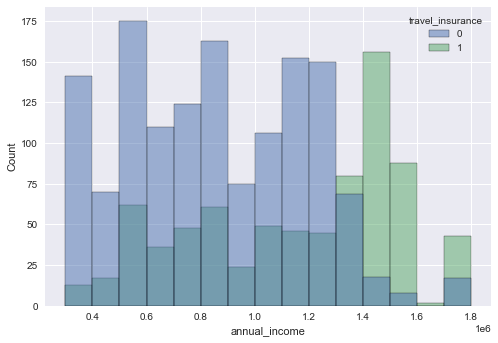

In [27]:
for item in ['age','annual_income']:
    sns.histplot(data=travel_df,x=travel_df[item],hue=travel_df['travel_insurance'])
    plt.show()

We observe lower rates of Travel Insurance in the middle of the age range and bottom two-thirds of the income distribution.

<AxesSubplot:xlabel='ever_travelled_abroad', ylabel='count'>

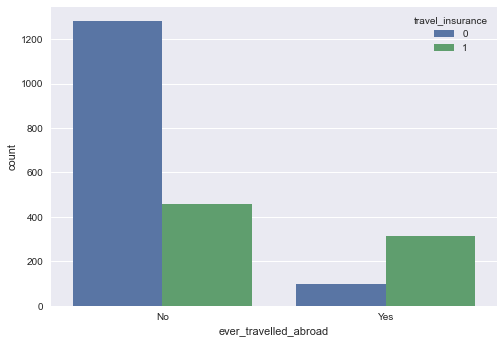

In [28]:
sns.countplot(x='ever_travelled_abroad',hue='travel_insurance',data=travel_df)

We can see that among the people who travelled abroad majority of them have bought travel insurance and the majority of people who haven't travelled abroad haven't bought travel insurance

<AxesSubplot:xlabel='graduate_or_not', ylabel='count'>

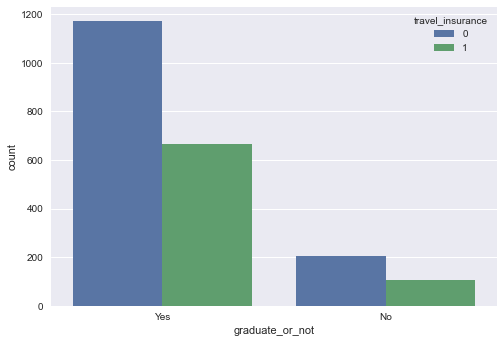

In [29]:
sns.countplot(x='graduate_or_not',hue='travel_insurance',data=travel_df)

From this graph we can observe that among the people who have graduated only 36% have bought the insurance and among the non graduates 33% have bought the insurance

<AxesSubplot:xlabel='annual_income', ylabel='Count'>

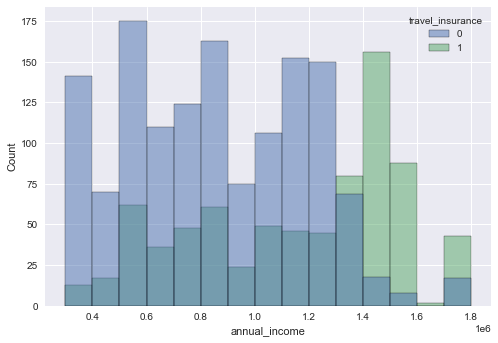

In [30]:
sns.histplot(data=travel_df, x='annual_income', hue='travel_insurance', )

People who have annual income greater than 1.3 million have bought more travel insurance than the rest.

<AxesSubplot:xlabel='age', ylabel='annual_income'>

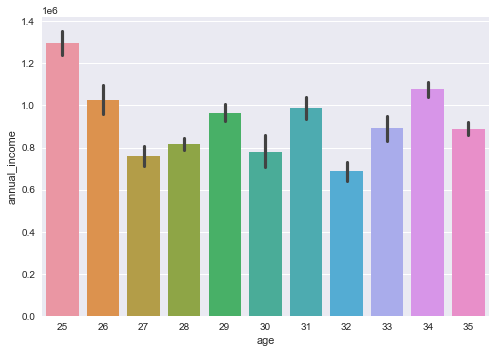

In [31]:
sns.barplot(x='age',y='annual_income',data = travel_df)

Gives us an overview how much annual income each age group has

<AxesSubplot:xlabel='family_members', ylabel='Count'>

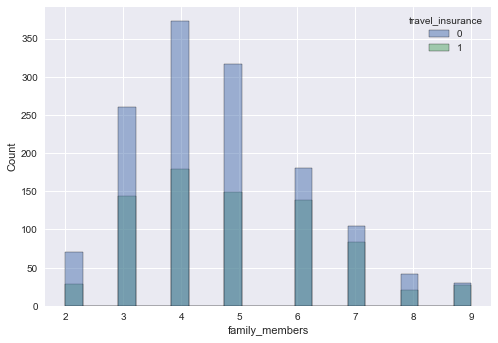

In [32]:
sns.histplot(x='family_members',hue='travel_insurance',data=travel_df)

We can see that families having members grater than 5 tend to buy travel insurance more.

<AxesSubplot:xlabel='employment_type', ylabel='Count'>

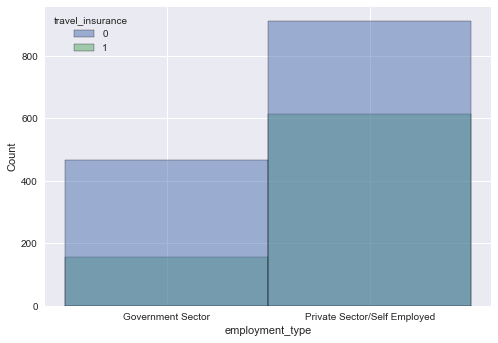

In [33]:
sns.histplot(x='employment_type',hue='travel_insurance',data=travel_df)

Private sector employees tend to buy travel insurance more compared to government sector employees

# Building Model

In [34]:
#Splitting the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)


In [35]:
from sklearn.preprocessing import StandardScaler
standardization = StandardScaler()

In [36]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,log_loss,classification_report


In [37]:
x_train = standardization.fit_transform(x_train)
x_test = standardization.fit_transform(x_test)
x_train = pd.DataFrame(x_train)
x_test = pd.DataFrame(x_test)

# Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
y_pred = logreg.predict(x_test)

In [39]:
print('Classification report for test data is : \n',
      classification_report(y_test, y_pred))

Classification report for test data is : 
               precision    recall  f1-score   support

           0       0.76      0.93      0.83       274
           1       0.79      0.47      0.59       156

    accuracy                           0.76       430
   macro avg       0.77      0.70      0.71       430
weighted avg       0.77      0.76      0.75       430



# KNN

In [40]:
from sklearn.neighbors import KNeighborsClassifier
acc_values = []
neighbors = np.arange(3,20)

for k in neighbors:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(x_train,y_train)
    y_pred = knn_classifier.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    acc_values.append(acc)

Text(0, 0.5, 'Accuracy')

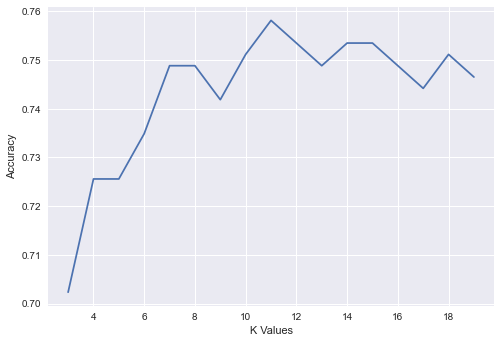

In [41]:
plt.plot(neighbors, acc_values)
plt.xlabel('K Values')
plt.ylabel('Accuracy')

we get max accuracy with k = 11

In [42]:
knn_classifier = KNeighborsClassifier(n_neighbors=11)
knn_classifier.fit(x_train,y_train)
y_pred = knn_classifier.predict(x_test)

In [43]:
print("ACCURACY: ",accuracy_score(y_test,y_pred))
print("PRECISION: ",precision_score(y_test,y_pred))
print("RECALL: ",recall_score(y_test,y_pred))
print("F1_score",f1_score(y_test,y_pred))

ACCURACY:  0.7581395348837209
PRECISION:  0.7708333333333334
RECALL:  0.47435897435897434
F1_score 0.5873015873015872


In [44]:
print('Classification report for test data is : \n',
      classification_report(y_test, y_pred))

Classification report for test data is : 
               precision    recall  f1-score   support

           0       0.75      0.92      0.83       274
           1       0.77      0.47      0.59       156

    accuracy                           0.76       430
   macro avg       0.76      0.70      0.71       430
weighted avg       0.76      0.76      0.74       430



# SVM

In [45]:
from sklearn.svm import SVC
acc_values = []
for item in ['linear','poly','rbf']:
    svm_classifier = SVC(kernel=item)
    svm_classifier.fit(x_train,y_train)
    y_pred = svm_classifier.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    acc_values.append(acc)

In [46]:
acc_values

[0.7348837209302326, 0.7604651162790698, 0.7697674418604651]

rbf kernel provides best result

In [47]:
svm_classifier = SVC(kernel='rbf')
svm_classifier.fit(x_train,y_train)
y_pred = svm_classifier.predict(x_test)

In [48]:
print("ACCURACY: ",accuracy_score(y_test,y_pred))
print("PRECISION: ",precision_score(y_test,y_pred))
print("RECALL: ",recall_score(y_test,y_pred))
print("F1_score",f1_score(y_test,y_pred))

ACCURACY:  0.7697674418604651
PRECISION:  0.7938144329896907
RECALL:  0.4935897435897436
F1_score 0.6086956521739131


In [49]:
print('Classification report for test data is : \n',
      classification_report(y_test, y_pred))

Classification report for test data is : 
               precision    recall  f1-score   support

           0       0.76      0.93      0.84       274
           1       0.79      0.49      0.61       156

    accuracy                           0.77       430
   macro avg       0.78      0.71      0.72       430
weighted avg       0.77      0.77      0.75       430



# Decision Tree

In [50]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(x_train,y_train)
y_pred = dt_classifier.predict(x_test)

In [51]:
print("ACCURACY: ",accuracy_score(y_test,y_pred))
print("PRECISION: ",precision_score(y_test,y_pred))
print("RECALL: ",recall_score(y_test,y_pred))
print("F1_score",f1_score(y_test,y_pred))

ACCURACY:  0.6627906976744186
PRECISION:  0.5341614906832298
RECALL:  0.5512820512820513
F1_score 0.5425867507886435


In [52]:
print('Classification report for test data is : \n',
      classification_report(y_test, y_pred))

Classification report for test data is : 
               precision    recall  f1-score   support

           0       0.74      0.73      0.73       274
           1       0.53      0.55      0.54       156

    accuracy                           0.66       430
   macro avg       0.64      0.64      0.64       430
weighted avg       0.67      0.66      0.66       430



# Random Forest

In [53]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(x_train,y_train)
y_pred = rf_classifier.predict(x_test)

In [54]:
print("ACCURACY: ",accuracy_score(y_test,y_pred))
print("PRECISION: ",precision_score(y_test,y_pred))
print("RECALL: ",recall_score(y_test,y_pred))
print("F1_score",f1_score(y_test,y_pred))

ACCURACY:  0.7627906976744186
PRECISION:  0.7288135593220338
RECALL:  0.5512820512820513
F1_score 0.6277372262773723


In [55]:
print('Classification report for test data is : \n',
      classification_report(y_test, y_pred))

Classification report for test data is : 
               precision    recall  f1-score   support

           0       0.78      0.88      0.83       274
           1       0.73      0.55      0.63       156

    accuracy                           0.76       430
   macro avg       0.75      0.72      0.73       430
weighted avg       0.76      0.76      0.75       430



# Gradient Boosting

In [56]:
from sklearn.ensemble import GradientBoostingClassifier 

gb_classifier = GradientBoostingClassifier(learning_rate=0.1)
gb_classifier.fit(x_train,y_train)
y_pred = gb_classifier.predict(x_test)

In [57]:
print("ACCURACY: ",accuracy_score(y_test,y_pred))
print("PRECISION: ",precision_score(y_test,y_pred))
print("RECALL: ",recall_score(y_test,y_pred))
print("F1_score",f1_score(y_test,y_pred))

ACCURACY:  0.8046511627906977
PRECISION:  0.8829787234042553
RECALL:  0.532051282051282
F1_score 0.6639999999999999


In [58]:
print('Classification report for test data is : \n',
      classification_report(y_test, y_pred))

Classification report for test data is : 
               precision    recall  f1-score   support

           0       0.78      0.96      0.86       274
           1       0.88      0.53      0.66       156

    accuracy                           0.80       430
   macro avg       0.83      0.75      0.76       430
weighted avg       0.82      0.80      0.79       430



# Hyper parameter Tuning of different models

# Gradient Boosting

In [59]:
model_parameters = {'n_estimators': [10, 50, 100, 200, 500, 750, 1000], 'max_depth': [3, 5, 10],
                    'min_samples_leaf': [np.random.randint(1,10)], 'max_features': [None, 'sqrt', 'log2']}


In [60]:
from sklearn.model_selection import GridSearchCV
model = GradientBoostingClassifier(random_state = 10)
gscv_GBM = GridSearchCV(estimator = model, 
                        param_grid = model_parameters, 
                        cv = 5, 
                        verbose = 1, 
                        n_jobs = -1,
                        scoring = 'roc_auc')

gscv_GBM.fit(x_train, y_train)

Fitting 5 folds for each of 63 candidates, totalling 315 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=10),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [6],
                         'n_estimators': [10, 50, 100, 200, 500, 750, 1000]},
             scoring='roc_auc', verbose=1)

In [61]:
print('The best parameters are -', gscv_GBM.best_params_)

The best parameters are - {'max_depth': 3, 'max_features': None, 'min_samples_leaf': 6, 'n_estimators': 100}


In [62]:
## Refitting the model with the best parameters

gb_classifier = GradientBoostingClassifier(**gscv_GBM.best_params_)
gb_classifier.fit(x_train,y_train)
y_pred = gb_classifier.predict(x_test)

In [63]:
print("ACCURACY: ",accuracy_score(y_test,y_pred))
print("PRECISION: ",precision_score(y_test,y_pred))
print("RECALL: ",recall_score(y_test,y_pred))
print("F1_score",f1_score(y_test,y_pred))

ACCURACY:  0.8023255813953488
PRECISION:  0.8817204301075269
RECALL:  0.5256410256410257
F1_score 0.6586345381526104


In [64]:
print('Classification report for test data is : \n',
      classification_report(y_test, y_pred))

Classification report for test data is : 
               precision    recall  f1-score   support

           0       0.78      0.96      0.86       274
           1       0.88      0.53      0.66       156

    accuracy                           0.80       430
   macro avg       0.83      0.74      0.76       430
weighted avg       0.82      0.80      0.79       430



We can see that it didn't make much of a difference

# Random Forest

In [65]:
model_parameters = {'n_estimators': [50, 100, 200, 400, 500, 700, 900],
               'criterion': ['gini', 'entropy'],
               'max_features': ['auto', 'sqrt', 'log2'],
               'max_depth': [None],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap': [True, False]}

In [66]:
from sklearn.model_selection import RandomizedSearchCV
model = RandomForestClassifier()

rf_search = RandomizedSearchCV(estimator = model, 
                               param_distributions = model_parameters, 
                               n_iter = 100, 
                               cv = 3, 
                               verbose=2, 
                               random_state=42, 
                               n_jobs = -1)

rf_search.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [None],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200, 400, 500,
                                                         700, 900]},
                   random_state=42, verbose=2)

In [67]:
rf_search.best_params_

{'n_estimators': 400,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': None,
 'criterion': 'entropy',
 'bootstrap': False}

In [71]:
rf_classifier = RandomForestClassifier(**rf_search.best_params_)
rf_classifier.fit(x_train,y_train)
y_pred = rf_classifier.predict(x_test)

In [72]:
print('Classification report for test data is : \n',
      classification_report(y_test, y_pred))

Classification report for test data is : 
               precision    recall  f1-score   support

           0       0.78      0.96      0.86       274
           1       0.88      0.54      0.67       156

    accuracy                           0.80       430
   macro avg       0.83      0.75      0.76       430
weighted avg       0.82      0.80      0.79       430



In random forest we can see a 4% increase in accuracy after hyperparameter tuning

# Logistic Regression

In [73]:
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
model_parameters = {'penalty':penalty,'solver':solvers,'C':c_values}

In [74]:
model = LogisticRegression()
logReg_search = GridSearchCV(estimator=model, param_grid=model_parameters, n_jobs=-1, cv=3, scoring='accuracy',error_score=0)
logReg_search.fit(x_test,y_test)

GridSearchCV(cv=3, error_score=0, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01], 'penalty': ['l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [75]:
logReg_search.best_params_

{'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}

In [76]:
logreg = LogisticRegression(**logReg_search.best_params_)
logreg.fit(x_train,y_train)
y_pred = logreg.predict(x_test)

In [77]:
print('Classification report for test data is : \n',
      classification_report(y_test, y_pred))

Classification report for test data is : 
               precision    recall  f1-score   support

           0       0.75      0.93      0.83       274
           1       0.79      0.47      0.59       156

    accuracy                           0.76       430
   macro avg       0.77      0.70      0.71       430
weighted avg       0.77      0.76      0.74       430



Here also we see no major improvements

# RESULT

Both Gradient Boosting and Random forest after hyperparameter tuning gives us an accuracy of 80% which is the highest compared to other models tested